In [38]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## Data loading

In [75]:
ticker = 'AAPL'

news = yf.Ticker(ticker).news

news_dict = {}

for article in tqdm(news):
    # Time information
    timestamp = article['providerPublishTime']
    datetime = dt.datetime.fromtimestamp(timestamp)
    
    # News text
    response = requests.get(article['link'])
    soup = BeautifulSoup(response.text, 'html.parser')

    article_text = ""
    for paragraph in soup.find_all('p'):
        article_text += paragraph.get_text() + "\n"

    news_dict[datetime] = [
        article['title'], 
        article['link'],
        article_text,
    ]

df = pd.DataFrame(news_dict, index=['Title', 'Link', 'Text']).T

display(df)

  0%|          | 0/8 [00:00<?, ?it/s]

,Title,Link,Text
2023-11-01 12:15:00,"After a 540% Rise, Why Does Warren Buffett Sti...",https://finance.yahoo.com/m/8510584c-17f7-3715...,Thank you for your patience.\nOur engineers ar...
2023-11-01 11:49:57,Apple's holiday-quarter forecast faces threat ...,https://finance.yahoo.com/news/apples-holiday-...,By Yuvraj Malik\n(Reuters) - Apple investors w...
2023-11-01 11:40:00,Better Buy: Apple vs. Coca-Cola,https://finance.yahoo.com/m/44f7b131-5315-3311...,Thank you for your patience.\nOur engineers ar...
2023-11-01 10:10:00,Is Apple Stock a Buy?,https://finance.yahoo.com/m/8a5d894a-0500-37fd...,Thank you for your patience.\nOur engineers ar...
2023-11-01 08:43:00,Ad Revenue Trends,https://finance.yahoo.com/m/36fdb1b3-c5a0-332b...,How Meta's spending on virtual reality could p...
2023-10-31 23:47:00,Time to Buy Apple (AAPL) or Qualcomm's (QCOM) ...,https://finance.yahoo.com/news/time-buy-apple-...,After renewing their partnership earlier in th...
2023-10-31 22:56:27,"Apple earnings: Guidance will be 'top of mind,...",https://finance.yahoo.com/video/apple-earnings...,Thank you for your patience.\nOur engineers ar...
2023-10-31 19:31:06,"Apple Stock Earnings Are Coming, Here's An Opt...",https://finance.yahoo.com/m/5e3052e3-04c5-3a31...,Earnings season is rolling on and Apple is due...


## Sentiment score

In [76]:
sia = SentimentIntensityAnalyzer()

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = i
    res[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(res).T

result_df = pd.concat([df, vaders], axis=1)

display(result_df) 
    

  0%|          | 0/8 [00:00<?, ?it/s]

,Title,Link,Text,neg,neu,pos,compound
2023-11-01 12:15:00,"After a 540% Rise, Why Does Warren Buffett Sti...",https://finance.yahoo.com/m/8510584c-17f7-3715...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-01 11:49:57,Apple's holiday-quarter forecast faces threat ...,https://finance.yahoo.com/news/apples-holiday-...,By Yuvraj Malik\n(Reuters) - Apple investors w...,0.022,0.885,0.093,0.9911
2023-11-01 11:40:00,Better Buy: Apple vs. Coca-Cola,https://finance.yahoo.com/m/44f7b131-5315-3311...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-01 10:10:00,Is Apple Stock a Buy?,https://finance.yahoo.com/m/8a5d894a-0500-37fd...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-01 08:43:00,Ad Revenue Trends,https://finance.yahoo.com/m/36fdb1b3-c5a0-332b...,How Meta's spending on virtual reality could p...,0.089,0.784,0.128,0.4404
2023-10-31 23:47:00,Time to Buy Apple (AAPL) or Qualcomm's (QCOM) ...,https://finance.yahoo.com/news/time-buy-apple-...,After renewing their partnership earlier in th...,0.013,0.859,0.129,0.9967
2023-10-31 22:56:27,"Apple earnings: Guidance will be 'top of mind,...",https://finance.yahoo.com/video/apple-earnings...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-10-31 19:31:06,"Apple Stock Earnings Are Coming, Here's An Opt...",https://finance.yahoo.com/m/5e3052e3-04c5-3a31...,Earnings season is rolling on and Apple is due...,0.036,0.889,0.076,0.3612


# Compare with stock price


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1h 2023-10-31 19:31:06 -> 2023-11-01 12:15:00)')
C:\Users\joneh\AppData\Local\Temp\ipykernel_26564\3090842914.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


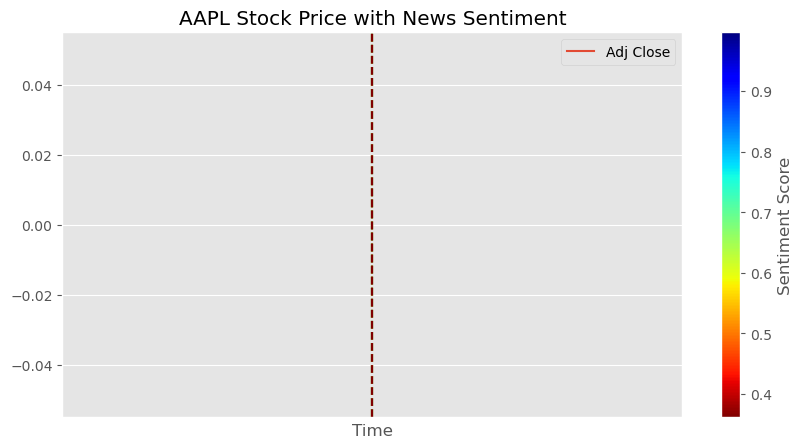

In [77]:

start = result_df.index.min()
end = result_df.index.max()

stock_data = yf.download(
    ticker, 
    start=start,
    end=end,
    interval='1h',
    progress=False
)[['Adj Close']]

cmap = plt.get_cmap('jet_r')
norm = plt.Normalize(result_df['compound'].min(), result_df['compound'].max()) 

fig, ax = plt.subplots(figsize=(10, 5))

stock_data.plot(xlabel='Time', ax=ax)

for i, row in result_df.iterrows():
    color = cmap(norm(row['compound']))
    ax.axvline(x=i, color=color, linestyle='--')

ax.set_title(f'{ticker} Stock Price with News Sentiment')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Create an empty array for the colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Sentiment Score')